In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd 
from pandas import DataFrame
from keras.activations import *
import glob
from sklearn.metrics import multilabel_confusion_matrix
import pickle
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import cross_validate
from sklearn import datasets
import cv2
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime
import time

Using TensorFlow backend.


In [ ]:
path = 'd:/VMS/del/Final_with_label_landmark_features_5.csv' # the path where all CSV are saved from part 1
Data_ALL = pd.read_csv(path, sep=',',header=0)

In [106]:
Data_ALL

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,62,63,64,65,66,67,Name,#,Column1,eye contact
0,0,29.206163,32.526913,37.013512,41.617306,46.043457,51.312767,55.470715,60.216278,63.411354,...,57.384666,56.727417,54.671749,54.488529,55.172459,57.280014,P08655_28_06_2019_144759_wc_frame_0.jpg,0,00:00:00,0
1,1,28.425341,31.827662,36.235340,41.617306,45.486263,50.774010,55.470715,59.640591,63.411354,...,58.137768,56.080299,54.037025,53.814495,55.901699,57.280014,P08655_28_06_2019_144759_wc_frame_1.jpg,1,00:00:01,0
2,2,28.425341,31.827662,37.013512,41.617306,46.324940,50.774010,55.470715,59.640591,63.411354,...,58.137768,56.080299,54.671749,53.814495,55.901699,57.280014,P08655_28_06_2019_144759_wc_frame_2.jpg,2,00:00:02,0
3,3,29.832869,32.557640,37.013512,41.617306,45.486263,50.774010,54.918121,58.821766,62.801273,...,57.384666,56.080299,54.037025,53.814495,55.901699,57.280014,P08655_28_06_2019_144759_wc_frame_3.jpg,3,00:00:03,0
4,4,29.068884,32.557640,37.013512,41.617306,46.324940,50.774010,55.758408,59.640591,63.411354,...,58.137768,56.080299,54.037025,54.561890,55.901699,57.280014,P08655_28_06_2019_144759_wc_frame_4.jpg,4,00:00:04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,132,24.596748,32.310989,40.804413,48.052055,55.443665,61.073727,67.029846,72.339478,74.148499,...,64.761101,64.327286,61.814240,60.415230,61.846584,62.361847,P09963_02_03_2020_084839_wc_frame_525.jpg,525,00:08:45,0
953,133,27.294687,34.539833,43.011627,50.447994,56.718605,63.198101,68.007355,72.173401,73.824112,...,66.287254,65.924202,63.505905,62.169125,63.348244,62.817196,P09963_02_03_2020_084839_wc_frame_526.jpg,526,00:08:46,0
954,134,29.154760,36.249138,43.657761,50.695168,56.885849,63.285069,69.007248,74.168724,74.813103,...,66.490601,66.098412,64.629715,63.150612,63.560993,64.031242,P09963_02_03_2020_084839_wc_frame_530.jpg,530,00:08:50,1
955,135,24.738634,32.557640,41.436699,49.254440,56.080299,64.007812,70.178345,74.813103,76.902534,...,67.720009,66.219330,64.536812,63.600315,65.145988,65.787537,P09963_02_03_2020_084839_wc_frame_532.jpg,532,00:08:52,1


In [107]:
# Data_ALL.iloc[:,1:75]
Data_ALL.iloc[:,69]

0        P08655_28_06_2019_144759_wc_frame_0.jpg
1        P08655_28_06_2019_144759_wc_frame_1.jpg
2        P08655_28_06_2019_144759_wc_frame_2.jpg
3        P08655_28_06_2019_144759_wc_frame_3.jpg
4        P08655_28_06_2019_144759_wc_frame_4.jpg
                         ...                    
952    P09963_02_03_2020_084839_wc_frame_525.jpg
953    P09963_02_03_2020_084839_wc_frame_526.jpg
954    P09963_02_03_2020_084839_wc_frame_530.jpg
955    P09963_02_03_2020_084839_wc_frame_532.jpg
956    P09963_02_03_2020_084839_wc_frame_543.jpg
Name: Name, Length: 957, dtype: object

In [41]:
Data_ALL.iloc[:,1:69]

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,29.206163,32.526913,37.013512,41.617306,46.043457,51.312767,55.470715,60.216278,63.411354,67.268120,...,55.973209,53.263496,60.811184,58.728188,57.384666,56.727417,54.671749,54.488529,55.172459,57.280014
1,28.425341,31.827662,36.235340,41.617306,45.486263,50.774010,55.470715,59.640591,63.411354,66.603302,...,55.317268,51.855568,60.811184,59.464275,58.137768,56.080299,54.037025,53.814495,55.901699,57.280014
2,28.425341,31.827662,37.013512,41.617306,46.324940,50.774010,55.470715,59.640591,63.411354,67.268120,...,55.317268,53.263496,60.811184,59.464275,58.137768,56.080299,54.671749,53.814495,55.901699,57.280014
3,29.832869,32.557640,37.013512,41.617306,45.486263,50.774010,54.918121,58.821766,62.801273,65.946945,...,54.561890,52.497620,60.811184,58.728188,57.384666,56.080299,54.037025,53.814495,55.901699,57.280014
4,29.068884,32.557640,37.013512,41.617306,46.324940,50.774010,55.758408,59.640591,63.411354,66.603302,...,54.561890,51.855568,60.811184,59.464275,58.137768,56.080299,54.037025,54.561890,55.901699,57.280014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,24.596748,32.310989,40.804413,48.052055,55.443665,61.073727,67.029846,72.339478,74.148499,74.464760,...,59.439045,58.694122,65.145988,65.253349,64.761101,64.327286,61.814240,60.415230,61.846584,62.361847
953,27.294687,34.539833,43.011627,50.447994,56.718605,63.198101,68.007355,72.173401,73.824112,73.756355,...,61.188232,60.406952,65.253349,65.734314,66.287254,65.924202,63.505905,62.169125,63.348244,62.817196
954,29.154760,36.249138,43.657761,50.695168,56.885849,63.285069,69.007248,74.168724,74.813103,73.756355,...,63.348244,61.400326,65.253349,65.969688,66.490601,66.098412,64.629715,63.150612,63.560993,64.031242
955,24.738634,32.557640,41.436699,49.254440,56.080299,64.007812,70.178345,74.813103,76.902534,77.491936,...,62.641838,61.392181,67.067131,67.357254,67.720009,66.219330,64.536812,63.600315,65.145988,65.787537


In [42]:
Visual_df=Data_ALL.iloc[:,1:69]

In [43]:
Visual_df.shape

(957, 68)

In [44]:
Data_ALL.iloc[:,72]

0      0
1      0
2      0
3      0
4      0
      ..
952    0
953    0
954    1
955    1
956    1
Name: eye contact, Length: 957, dtype: int64

In [45]:
lable_df=Data_ALL.iloc[:,72]

In [46]:
lable_df

0      0
1      0
2      0
3      0
4      0
      ..
952    0
953    0
954    1
955    1
956    1
Name: eye contact, Length: 957, dtype: int64

In [47]:
# lables_df = pd.factorize(lable_df)

In [54]:
lable_df.shape

(957,)

In [74]:
Visual=Visual_df.to_numpy(dtype='float32',na_value=0)
lables=lable_df.to_numpy(dtype='float32',na_value=0)

In [75]:
lables=lables.reshape(-1,1)

In [ ]:
lables

In [77]:
lables=lables.reshape(lables.shape[0],)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(Visual_df, lables, 
                                                    test_size=0.0001, random_state=1234,shuffle=True)

In [90]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler() #preprocessing.StandardScaler() preprocessing.MinMaxScaler()
X_train = mm_scaler.fit_transform(X_train)
X_test = mm_scaler.transform(X_test)

In [91]:
y_test.shape

(1,)

In [24]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [25]:
CVModel = RandomForestClassifier(random_state=1)
cv = cross_validate(CVModel, X_train, y_train, cv=10)
print(cv['test_score'])
print(cv['test_score'].mean())

[0.56060606 0.6969697  0.62121212 0.66666667 0.56060606 0.63636364
 0.55384615 0.6        0.67692308 0.55384615]
0.6127039627039627


In [26]:
from sklearn.svm import SVC

In [27]:
CVModel2 = SVC(gamma='auto')
cv2 = cross_validate(CVModel2, X_train, y_train, cv=10)
print(cv2['test_score'])
print(cv2['test_score'].mean())

[0.46969697 0.54545455 0.40909091 0.51515152 0.5        0.46969697
 0.47692308 0.6        0.53846154 0.49230769]
0.5016783216783216


In [28]:
CVModel.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [29]:
y_pred = CVModel.predict(X_test)

In [30]:
y_pred

array([0.], dtype=float32)

In [31]:
y_test

array([1.], dtype=float32)

In [32]:
filename = 'RF_model_Final.sav'
# # save the model to disk
pickle.dump(CVModel, open(filename, 'wb'))

In [63]:
# Instantiate model with 1000 decision trees
classifier = RandomForestClassifier(
    n_estimators=30,
    criterion='gini',
    max_depth=13,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=0,
    verbose=1,
    warm_start=False,
    class_weight='balanced')

classifier.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.0s finished


RandomForestClassifier(class_weight='balanced', max_depth=13, n_estimators=30,
                       n_jobs=-1, random_state=0, verbose=1)

In [92]:
#To load the model later
loaded_model = pickle.load(open("RF_model_Final.sav", 'rb'))
# result = loaded_model.score(X_test, y_test)
# print(result)

In [93]:
y_pred = loaded_model.predict(X_train)

In [94]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_train,y_pred))
print(classification_report(y_train,y_pred))
print(accuracy_score(y_train, y_pred))

[[215 412]
 [116 213]]
              precision    recall  f1-score   support

         0.0       0.65      0.34      0.45       627
         1.0       0.34      0.65      0.45       329

    accuracy                           0.45       956
   macro avg       0.50      0.50      0.45       956
weighted avg       0.54      0.45      0.45       956

0.4476987447698745


In [103]:
loaded_model.predict(X_test)

array([1.], dtype=float32)

In [ ]:
y_pred2 = classifier.predict(X_test)

In [65]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))
print(accuracy_score(y_test, y_pred2))

[[15  7]
 [ 3  8]]
              precision    recall  f1-score   support

         0.0       0.83      0.68      0.75        22
         1.0       0.53      0.73      0.62        11

    accuracy                           0.70        33
   macro avg       0.68      0.70      0.68        33
weighted avg       0.73      0.70      0.71        33

0.696969696969697


In [57]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6818181818181818

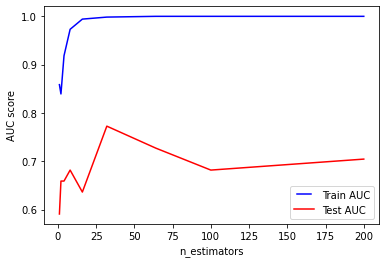

In [58]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, "b", label="Train AUC")
line2, = plt.plot(n_estimators, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()

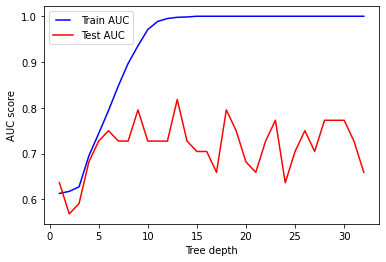

In [59]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, "b", label="Train AUC")
line2, = plt.plot(max_depths, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depth")
plt.show()

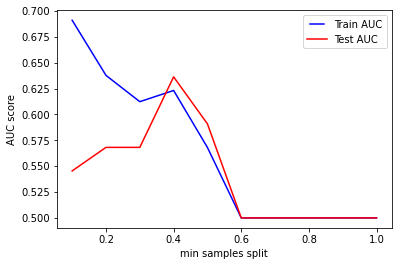

In [60]:
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   rf = RandomForestClassifier(min_samples_split=min_samples_split)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, "b", label="Train AUC")
line2, = plt.plot(min_samples_splits, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples split")
plt.show()

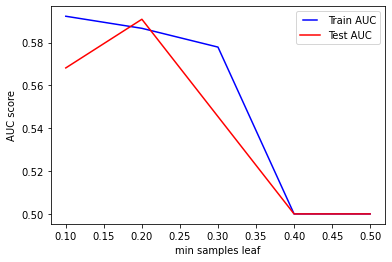

In [61]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   rf = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, "b", label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples leaf")
plt.show()

In [37]:
print(y_train[5])
print(y_train[71])

0.0
0.0


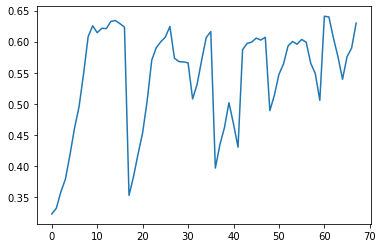

In [33]:
#With eye contact
plt.plot(X_train[30,:])


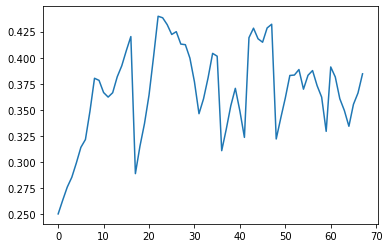

In [34]:
plt.figure()
plt.plot(X_train[10,:])

In [40]:
print(y_train[6])
print(y_train[10])

1.0
1.0


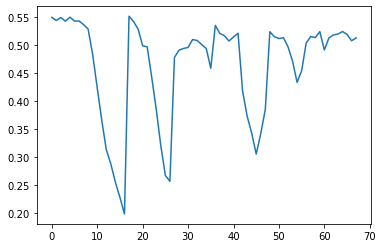

In [35]:
#With NO eye contact
plt.figure()
plt.plot(X_train[6,:])

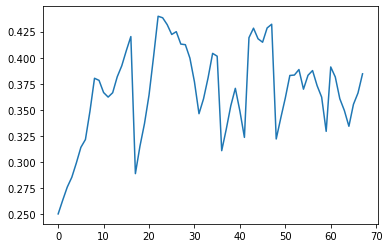

In [36]:
#With NO eye contact
plt.figure()
plt.plot(X_train[10,:])

In [43]:
#history.history

In [254]:
y_train[5]

0.0

In [61]:
filename = 'RF_model_Final.sav'

In [62]:

# # save the model to disk
# pickle.dump(classifier, open(filename, 'wb'))

In [53]:
#To load the model later
loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, y_test)
# print(result)

In [5]:
#++++++++++++++Prediction part ============================================================

In [57]:
fileName="P09966_04_03_2020_163313_wc_landmark_features_10.csv"

In [58]:
testin_gpath = 'd:/VMS/del/landmark_features/'+fileName

In [59]:
testing = pd.read_csv(testin_gpath, sep=',',header=None)

In [60]:
testing_np=testing.to_numpy(dtype='float32',na_value=0)

In [61]:
testing.shape

(360, 422)

In [62]:
mm_scaler = preprocessing.MinMaxScaler() #preprocessing.StandardScaler()
testing = mm_scaler.fit_transform(testing_np)
testing = mm_scaler.transform(testing_np)

In [63]:
y_pred = loaded_model.predict(testing)

In [64]:
y_pred=y_pred.reshape(-1,1)

In [65]:
Tomor_pred=DataFrame(y_pred,columns=['eye'])

In [66]:
gfg_csv_data = Tomor_pred.to_csv('d:/VMS/del/Pred/'+fileName, index = True) 
print('\nCSV String:\n', gfg_csv_data) 


CSV String:
 None


In [67]:
y_pred.shape

(360, 1)

In [16]:
Tomor_pred

,eye
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
534,1.0
535,1.0
536,1.0
537,0.0


In [1]:
#Deep Learning ********************************************* using VGG16 for Prediction ===========================================================

In [2]:
from tensorflow import keras
# eye_contact_model = keras.models.load_model("D:/VMS/fer2013_Best/cs230-fer-master/eye_contact_4.h5")
eye_contact_model = keras.models.load_model("D:/VMS/fer2013_Best/cs230-fer-master/Test999.h5")
emo_model = keras.models.load_model("D:/VMS/fer2013_Best/cs230-fer-master/VGG16-AUX-BEST-70.2.h5")

In [3]:
output_path="D:/VMS/del/RAW/"

In [4]:
emo_list = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
eye_contact=('NO', 'Yes')

In [5]:
X = []
y_eye=[]
y_emo=[]
img_name=[]
def Prediction_eye_emo(path):
# the path where all images will be preprocessed 
    all_files = glob.glob(output_path+"/"+path+'/faces/')
    Frames_list=os.listdir(all_files[0])
    Frames_list = sorted(Frames_list, key = lambda x: int(x.split("_")[-1].split(".")[0]))
    #print(len(all_files))
    for filename in Frames_list:
        img_array = cv2.imread(all_files[0]+filename ,1)
        X.append(img_array)
        img_name.append(filename) 
        
    X_np = np.array(X).reshape(-1, 197, 197,3)
    imgs_all= X_np/255.0
    img_name_np=np.array(img_name)
    y_pred_eye = eye_contact_model.predict(imgs_all)
    y_pred_emo = emo_model.predict(imgs_all)
    Y_pre_eye_final =np.around(y_pred_eye, decimals=0, out=None)
    Y_pre_emo_final =np.array(y_pred_emo)
    return img_name_np,Y_pre_eye_final,Y_pre_emo_final

In [6]:
start_time = datetime.now()
mp4_Frames_Path=os.listdir(output_path)
print ("Total of Dir =" + str(len(mp4_Frames_Path)) )
counter=1
for frmspath in mp4_Frames_Path:  #loop Dir to send to function!
    print(frmspath)
    Folder_name=os.path.splitext(frmspath)[0]
    ix,y_eye,y_emo=Prediction_eye_emo(frmspath)
    counter = counter +1


end_time = datetime.now()
print('\n Duration: {}'.format(end_time - start_time))

Total of Dir =15
P09784_10_03_2020_200935_wc
P09784_10_03_2020_210248_wc
P09859_10_03_2020_181030_wc
P09894_10_03_2020_192547_wc
P09951_10_03_2020_183819_wc
P09953_02_02_2020_211308_wc
P09953_03_02_2020_100458_wc
P09959_10_03_2020_205800_wc
P09961_10_03_2020_185251_wc
P09961_10_03_2020_190252_wc
P09963_02_03_2020_083828_wc
P09963_02_03_2020_084839_wc
P09963_08_03_2020_231229_wc
P09963_10_03_2020_184005_wc
P09966_04_03_2020_163313_wc

 Duration: 0:05:37.018279


In [7]:
y_eye_reshapped=y_eye.reshape(-1).astype(np.int16)

In [8]:
y_eye_reshapped

array([0, 0, 1, ..., 1, 0, 0], dtype=int16)

In [9]:
results_list=[]
for a,b,c in zip(ix,y_eye_reshapped,y_emo): 
    c = np.argmax(c)
    results_list.append([a,eye_contact[b],emo_list[c]])

In [ ]:
results_list

In [11]:
results_df = pd.DataFrame(results_list, columns = ['Img_name','Eye_Conact','Facial_Emotion'])

In [12]:
results_df

,Img_name,Eye_Conact,Facial_Emotion
0,P09784_10_03_2020_200935_wc_frame_1.jpg,NO,sad
1,P09784_10_03_2020_200935_wc_frame_2.jpg,NO,sad
2,P09784_10_03_2020_200935_wc_frame_3.jpg,Yes,sad
3,P09784_10_03_2020_200935_wc_frame_4.jpg,NO,sad
4,P09784_10_03_2020_200935_wc_frame_5.jpg,NO,sad
...,...,...,...
7093,P09966_04_03_2020_163313_wc_frame_555.jpg,NO,sad
7094,P09966_04_03_2020_163313_wc_frame_556.jpg,NO,sad
7095,P09966_04_03_2020_163313_wc_frame_597.jpg,Yes,sad
7096,P09966_04_03_2020_163313_wc_frame_598.jpg,NO,sad


In [13]:
results_df["Eye_Conact"] = results_df["Eye_Conact"].astype("category")

In [14]:
results_df["Facial_Emotion"] = results_df["Facial_Emotion"].astype("category")

In [15]:
results_df['Img_name']=results_df['Img_name'].str.split('_',n=6).str[0:5].str.join('_')

In [16]:
results_df

,Img_name,Eye_Conact,Facial_Emotion
0,P09784_10_03_2020_200935,NO,sad
1,P09784_10_03_2020_200935,NO,sad
2,P09784_10_03_2020_200935,Yes,sad
3,P09784_10_03_2020_200935,NO,sad
4,P09784_10_03_2020_200935,NO,sad
...,...,...,...
7093,P09966_04_03_2020_163313,NO,sad
7094,P09966_04_03_2020_163313,NO,sad
7095,P09966_04_03_2020_163313,Yes,sad
7096,P09966_04_03_2020_163313,NO,sad


In [17]:
# pd.pivot_table(results_df, values=['Eye_Conact'],columns=['Img_name'], aggfunc='count')

In [18]:
# results_df.set_index(["Img_name", "Eye_Conact"]).count(level="Eye_Conact")

In [19]:
captured_frames=results_df[['Img_name','Eye_Conact']].groupby(['Img_name']).count()
captured_frames = captured_frames.rename({'Eye_Conact': 'captured_frames'},axis=1)  

In [20]:
captured_frames

,captured_frames
Img_name,
P09784_10_03_2020_200935,496
P09784_10_03_2020_210248,523
P09859_10_03_2020_181030,405
P09894_10_03_2020_192547,526
P09951_10_03_2020_183819,539
P09953_02_02_2020_211308,499
P09953_03_02_2020_100458,416
P09959_10_03_2020_205800,509
P09961_10_03_2020_185251,337


In [21]:
from xlrd import open_workbook
import os.path

In [22]:
counting_img_Source = pd.ExcelFile("D:/VMS/del/counting.xlsx",engine='openpyxl')

In [23]:
counting_img = pd.read_excel(counting_img_Source,"Sheet1")
del counting_img["Unnamed: 0"]

In [24]:
counting_img['Img_name']=counting_img['Img_name'].str.split('_',n=6).str[0:5].str.join('_')
counting_img = counting_img.set_index('Img_name')

In [25]:
counting_img

,Total_Frames
Img_name,
P09784_10_03_2020_200935,600
P09784_10_03_2020_210248,600
P09859_10_03_2020_181030,600
P09894_10_03_2020_192547,600
P09951_10_03_2020_183819,600
P09953_02_02_2020_211308,600
P09953_03_02_2020_100458,564
P09959_10_03_2020_205800,600
P09961_10_03_2020_185251,600


In [26]:
 captured_frames_final=pd.concat([captured_frames,counting_img], axis=1)

In [27]:
captured_frames_final['captured']=captured_frames_final.captured_frames / captured_frames_final.Total_Frames

In [28]:
captured_frames_final
del captured_frames_final["captured_frames"]
del captured_frames_final["Total_Frames"]

In [29]:
captured_frames_final

,captured
Img_name,
P09784_10_03_2020_200935,0.826667
P09784_10_03_2020_210248,0.871667
P09859_10_03_2020_181030,0.675000
P09894_10_03_2020_192547,0.876667
P09951_10_03_2020_183819,0.898333
P09953_02_02_2020_211308,0.831667
P09953_03_02_2020_100458,0.737589
P09959_10_03_2020_205800,0.848333
P09961_10_03_2020_185251,0.561667


In [30]:
eye_contact=results_df[['Img_name','Eye_Conact']].loc[results_df['Eye_Conact'] == 'Yes'].groupby(['Img_name']).count()/results_df[['Img_name','Eye_Conact']].groupby(['Img_name']).count()

In [31]:
eye_contact 

,Eye_Conact
Img_name,
P09784_10_03_2020_200935,0.413306
P09784_10_03_2020_210248,0.216061
P09859_10_03_2020_181030,0.316049
P09894_10_03_2020_192547,0.313688
P09951_10_03_2020_183819,0.191095
P09953_02_02_2020_211308,0.058116
P09953_03_02_2020_100458,0.120192
P09959_10_03_2020_205800,0.273084
P09961_10_03_2020_185251,0.433234


In [32]:
sad=results_df[['Img_name','Facial_Emotion']].loc[results_df['Facial_Emotion'] == 'sad'].groupby(['Img_name']).count()/results_df[['Img_name','Facial_Emotion']].groupby(['Img_name']).count()

In [33]:
sad = sad.rename({'Facial_Emotion': 'sad'},axis=1)  

In [34]:
sad

,sad
Img_name,
P09784_10_03_2020_200935,0.991935
P09784_10_03_2020_210248,0.892925
P09859_10_03_2020_181030,0.671605
P09894_10_03_2020_192547,0.722433
P09951_10_03_2020_183819,0.599258
P09953_02_02_2020_211308,0.995992
P09953_03_02_2020_100458,0.990385
P09959_10_03_2020_205800,0.671906
P09961_10_03_2020_185251,0.394659


In [35]:
angry=results_df[['Img_name','Facial_Emotion']].loc[results_df['Facial_Emotion'] == 'angry'].groupby(['Img_name']).count()/results_df[['Img_name','Facial_Emotion']].groupby(['Img_name']).count()

In [36]:
angry=angry.rename({'Facial_Emotion': 'angry'},axis=1)
angry

,angry
Img_name,
P09784_10_03_2020_200935,0.004032
P09784_10_03_2020_210248,0.063098
P09859_10_03_2020_181030,0.167901
P09894_10_03_2020_192547,0.011407
P09951_10_03_2020_183819,0.372913
P09953_02_02_2020_211308,NaN
P09953_03_02_2020_100458,NaN
P09959_10_03_2020_205800,0.125737
P09961_10_03_2020_185251,0.275964


In [37]:
surprise=results_df[['Img_name','Facial_Emotion']].loc[results_df['Facial_Emotion'] == 'surprise'].groupby(['Img_name']).count()/results_df[['Img_name','Facial_Emotion']].groupby(['Img_name']).count()

In [38]:
surprise=surprise.rename({'Facial_Emotion': 'surprise'},axis=1)
surprise

,surprise
Img_name,
P09784_10_03_2020_200935,NaN
P09784_10_03_2020_210248,NaN
P09859_10_03_2020_181030,0.004938
P09894_10_03_2020_192547,0.001901
P09951_10_03_2020_183819,0.005566
P09953_02_02_2020_211308,NaN
P09953_03_02_2020_100458,0.002404
P09959_10_03_2020_205800,0.086444
P09961_10_03_2020_185251,NaN


In [39]:
fear=results_df[['Img_name','Facial_Emotion']].loc[results_df['Facial_Emotion'] == 'fear'].groupby(['Img_name']).count()/results_df[['Img_name','Facial_Emotion']].groupby(['Img_name']).count()

In [40]:
fear=fear.rename({'Facial_Emotion': 'fear'},axis=1)
fear

,fear
Img_name,
P09784_10_03_2020_200935,NaN
P09784_10_03_2020_210248,0.026769
P09859_10_03_2020_181030,0.004938
P09894_10_03_2020_192547,0.019011
P09951_10_03_2020_183819,0.001855
P09953_02_02_2020_211308,0.002004
P09953_03_02_2020_100458,0.007212
P09959_10_03_2020_205800,0.045187
P09961_10_03_2020_185251,0.228487


In [41]:
happy=results_df[['Img_name','Facial_Emotion']].loc[results_df['Facial_Emotion'] == 'happy'].groupby(['Img_name']).count()/results_df[['Img_name','Facial_Emotion']].groupby(['Img_name']).count()

In [42]:
happy=happy.rename({'Facial_Emotion': 'happy'},axis=1)
happy

,happy
Img_name,
P09784_10_03_2020_200935,NaN
P09784_10_03_2020_210248,0.005736
P09859_10_03_2020_181030,0.014815
P09894_10_03_2020_192547,0.015209
P09951_10_03_2020_183819,0.003711
P09953_02_02_2020_211308,NaN
P09953_03_02_2020_100458,NaN
P09959_10_03_2020_205800,0.005894
P09961_10_03_2020_185251,0.074184


In [43]:
neutral=results_df[['Img_name','Facial_Emotion']].loc[results_df['Facial_Emotion'] == 'neutral'].groupby(['Img_name']).count()/results_df[['Img_name','Facial_Emotion']].groupby(['Img_name']).count()

In [44]:
neutral=neutral.rename({'Facial_Emotion': 'neutral'},axis=1)
neutral

,neutral
Img_name,
P09784_10_03_2020_200935,0.004032
P09784_10_03_2020_210248,0.011472
P09859_10_03_2020_181030,0.135802
P09894_10_03_2020_192547,0.230038
P09951_10_03_2020_183819,0.016698
P09953_02_02_2020_211308,0.002004
P09953_03_02_2020_100458,NaN
P09959_10_03_2020_205800,0.062868
P09961_10_03_2020_185251,0.026706


In [45]:
disgust=results_df[['Img_name','Facial_Emotion']].loc[results_df['Facial_Emotion'] == 'disgust'].groupby(['Img_name']).count()/results_df[['Img_name','Facial_Emotion']].groupby(['Img_name']).count()

In [46]:
disgust=disgust.rename({'Facial_Emotion': 'disgust'},axis=1)
disgust

,disgust
Img_name,
P09784_10_03_2020_200935,NaN
P09784_10_03_2020_210248,NaN
P09859_10_03_2020_181030,NaN
P09894_10_03_2020_192547,NaN
P09951_10_03_2020_183819,NaN
P09953_02_02_2020_211308,NaN
P09953_03_02_2020_100458,NaN
P09959_10_03_2020_205800,0.001965
P09961_10_03_2020_185251,NaN


In [47]:
results_df.value_counts()

Img_name                  Eye_Conact  Facial_Emotion
P09953_02_02_2020_211308  NO          sad               468
P09784_10_03_2020_210248  NO          sad               375
P09953_03_02_2020_100458  NO          sad               362
P09784_10_03_2020_200935  NO          sad               287
P09951_10_03_2020_183819  NO          sad               279
                                                       ... 
P09953_02_02_2020_211308  NO          neutral             1
                                      fear                1
P09951_10_03_2020_183819  NO          surprise            1
                                      fear                1
P09966_04_03_2020_163313  NO          fear                1
Length: 140, dtype: int64

In [48]:
result = pd.concat([eye_contact, sad,angry,surprise,fear,happy,neutral,disgust,captured_frames_final], axis=1)

In [49]:
result

,Eye_Conact,sad,angry,surprise,fear,happy,neutral,disgust,captured
Img_name,,,,,,,,,
P09784_10_03_2020_200935,0.413306,0.991935,0.004032,NaN,NaN,NaN,0.004032,NaN,0.826667
P09784_10_03_2020_210248,0.216061,0.892925,0.063098,NaN,0.026769,0.005736,0.011472,NaN,0.871667
P09859_10_03_2020_181030,0.316049,0.671605,0.167901,0.004938,0.004938,0.014815,0.135802,NaN,0.675000
P09894_10_03_2020_192547,0.313688,0.722433,0.011407,0.001901,0.019011,0.015209,0.230038,NaN,0.876667
P09951_10_03_2020_183819,0.191095,0.599258,0.372913,0.005566,0.001855,0.003711,0.016698,NaN,0.898333
P09953_02_02_2020_211308,0.058116,0.995992,NaN,NaN,0.002004,NaN,0.002004,NaN,0.831667
P09953_03_02_2020_100458,0.120192,0.990385,NaN,0.002404,0.007212,NaN,NaN,NaN,0.737589
P09959_10_03_2020_205800,0.273084,0.671906,0.125737,0.086444,0.045187,0.005894,0.062868,0.001965,0.848333
P09961_10_03_2020_185251,0.433234,0.394659,0.275964,NaN,0.228487,0.074184,0.026706,NaN,0.561667


In [50]:
result= result.fillna(0)

In [51]:
result

,Eye_Conact,sad,angry,surprise,fear,happy,neutral,disgust,captured
Img_name,,,,,,,,,
P09784_10_03_2020_200935,0.413306,0.991935,0.004032,0.000000,0.000000,0.000000,0.004032,0.000000,0.826667
P09784_10_03_2020_210248,0.216061,0.892925,0.063098,0.000000,0.026769,0.005736,0.011472,0.000000,0.871667
P09859_10_03_2020_181030,0.316049,0.671605,0.167901,0.004938,0.004938,0.014815,0.135802,0.000000,0.675000
P09894_10_03_2020_192547,0.313688,0.722433,0.011407,0.001901,0.019011,0.015209,0.230038,0.000000,0.876667
P09951_10_03_2020_183819,0.191095,0.599258,0.372913,0.005566,0.001855,0.003711,0.016698,0.000000,0.898333
P09953_02_02_2020_211308,0.058116,0.995992,0.000000,0.000000,0.002004,0.000000,0.002004,0.000000,0.831667
P09953_03_02_2020_100458,0.120192,0.990385,0.000000,0.002404,0.007212,0.000000,0.000000,0.000000,0.737589
P09959_10_03_2020_205800,0.273084,0.671906,0.125737,0.086444,0.045187,0.005894,0.062868,0.001965,0.848333
P09961_10_03_2020_185251,0.433234,0.394659,0.275964,0.000000,0.228487,0.074184,0.026706,0.000000,0.561667


In [52]:
from openpyxl import Workbook

In [53]:
result.to_excel("result_I.xlsx",
             sheet_name='Sheet_name_1')